In [24]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cd_df = pd.read_csv(city_data_to_load)
rd_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(rd_df, cd_df,
                                 how='outer', on='city')

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [25]:
#Summarize data by city to include average fare, ride count, driver count
driver_count_by_df = pd.pivot_table(combined_data_df,index=['city','type'],
                                       values=['fare','ride_id','driver_count'],
                                       aggfunc={'fare':np.sum,'ride_id': lambda x: len(x.unique()),
                                               'driver_count':np.sum})

In [26]:
driver_count_by_df.head()

,,driver_count,fare,ride_id
city,type,,,
Amandaburgh,Urban,216,443.55,18
Barajasview,Urban,572,557.31,22
Barronchester,Suburban,176,582.76,16
Bethanyland,Suburban,396,593.21,18
Bradshawfurt,Rural,70,400.64,10


## Bubble Plot of Ride Sharing Data

In [27]:
driver_count_by_df = driver_count_by_df.sort_values(by=['ride_id']).reset_index()

In [28]:
driver_count_by_df['average Fare'] = driver_count_by_df['fare']/driver_count_by_df['ride_id']

In [29]:
driver_count_by_df.tail()

,city,type,driver_count,fare,ride_id,average Fare
115,Liumouth,Urban,2277,862.95,33,26.150000
116,Port Frank,Urban,759,897.65,33,27.201515
117,North Jason,Urban,210,796.03,35,22.743714
118,South Karenland,Urban,152,1008.35,38,26.535526
119,West Angela,Urban,1872,1013.61,39,25.990000


In [30]:
driver_count_by_df.rename(columns={'ride_id':'total_num_ride'},index=str,inplace=True)

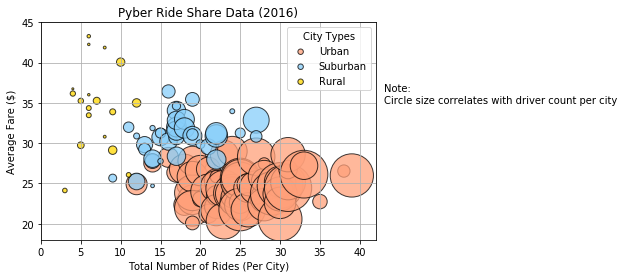

In [31]:
#set colors
cmap = {'Rural':'gold','Suburban':'lightskyblue','Urban':'lightsalmon'}

#Urban
x1 = driver_count_by_df[driver_count_by_df.type=="Urban"]['total_num_ride']
y1 = driver_count_by_df[driver_count_by_df.type=="Urban"]['average Fare']
area1 = driver_count_by_df[driver_count_by_df.type=="Urban"]['driver_count']
colors1 = driver_count_by_df[driver_count_by_df.type=="Urban"]['type'].map(cmap)
#Suburban
x2 = driver_count_by_df[driver_count_by_df.type=="Suburban"]['total_num_ride']
y2 = driver_count_by_df[driver_count_by_df.type=="Suburban"]['average Fare']
area2 = driver_count_by_df[driver_count_by_df.type=="Suburban"]['driver_count']
colors2 = driver_count_by_df[driver_count_by_df.type=="Suburban"]['type'].map(cmap)
#Rural
x3 = driver_count_by_df[driver_count_by_df.type=="Rural"]['total_num_ride']
y3 = driver_count_by_df[driver_count_by_df.type=="Rural"]['average Fare']
area3 = driver_count_by_df[driver_count_by_df.type=="Rural"]['driver_count']
colors3 = driver_count_by_df[driver_count_by_df.type=="Rural"]['type'].map(cmap)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
my_labels = ['Urban', 'Suburban', 'Rural']
ax.scatter(x1, y1, s=area1,  marker='o', edgecolors="black",
           c=colors1, alpha=0.75)
ax.scatter(x2, y2, s=area2,  marker='o', edgecolors="black",
           c=colors2, alpha=0.75)
ax.scatter(x3, y3, s=area3,  marker='o', edgecolors="black",
           c=colors3, alpha=0.75)
ax.set_xlabel('Total Number of Rides (Per City)',fontsize=10)
ax.set_ylabel('Average Fare ($)',fontsize=10)
ax.set_title('Pyber Ride Share Data (2016)')
lgnd = ax.legend(title='City Types',labels = my_labels)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
ax.grid(True)
plt.xlim(0,42)
plt.ylim(18,45)
fig.text(0.92,0.6,'Note: \nCircle size correlates with driver count per city',transform=plt.gcf().transFigure)
plt.savefig("Images/PyberBubble.png")
plt.show()

## Total Fares by City Type

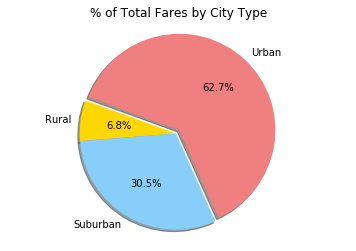

In [32]:
# Calculate Type Percents

total_fares_city_df = pd.pivot_table(combined_data_df,index=['type'],
                                       values=['fare'],
                                       aggfunc={'fare':np.sum}).reset_index()
# Build Pie Chart

# Save Figure
labels = total_fares_city_df['type']
sizes = total_fares_city_df['fare']
colors = ['gold','lightskyblue','lightcoral']
explode = (0, 0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('% of Total Fares by City Type')
plt.savefig("Images/PyberPieFares.png")
plt.show()

## Total Rides by City Type

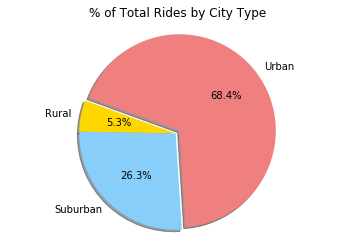

In [33]:
# Calculate Type Percents
# Display the data table for preview
total_rides_city_df = pd.pivot_table(driver_count_by_df,index=['type'],
                                       values=['total_num_ride'],
                                       aggfunc={'total_num_ride':np.sum}).reset_index()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0, 0.05)
labels = total_rides_city_df['type']
sizes = total_rides_city_df['total_num_ride']
colors = ['gold','lightskyblue','lightcoral']
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode,colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=160)
ax.set_title('% of Total Rides by City Type')
ax.axis('equal')
plt.savefig("Images/PyberPieRides.png")
plt.show()

#save image

## Total Drivers by City Type

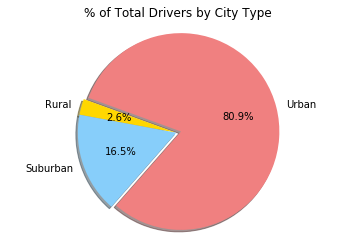

In [34]:
total_driver_city_df = pd.pivot_table(cd_df,index=['type'],
                                       values=['driver_count'],
                                       aggfunc={'driver_count':np.sum}).reset_index()
labels = total_driver_city_df['type']
sizes = total_driver_city_df['driver_count']
colors = ['gold','lightskyblue','lightcoral']
explode = (0, 0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160)
ax1.axis('equal') 
ax1.set_title('% of Total Drivers by City Type')
plt.savefig("Images/PyberDrivers.png")
plt.show()
